In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
## EDA : Feature Engineering : Exploring Missing Values, Duplicate Values, Improper Data Types, Unique Values

# Check Missing Data values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No Missing Data Values

# Unique Values in the Data

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [25]:
print("Unique values in gender Category: (", df['gender'].nunique(), ") - ", end=" ")
print(df['gender'].unique())

print("Unique values in race_ethnicity column: (", df['race_ethnicity'].unique(), ") - ", end=" ")
print(df['race_ethnicity'].unique())

print("Unique values in parental_level_of_education: (", df['parental_level_of_education'].nunique(), ") - ", end=" ")
print(df['parental_level_of_education'].unique())

print("Unique Values in lunch: (", df['lunch'].nunique(), ") - ", end=" ")
print(df['lunch'].unique())

print("Unique Values in test_preparation_course: (", df['test_preparation_course'].nunique(), ") - ", end=" ")
print(df['test_preparation_course'].unique())

Unique values in gender Category: ( 2 ) -  ['female' 'male']
Unique values in race_ethnicity column: ( ['group B' 'group C' 'group A' 'group D' 'group E'] ) -  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental_level_of_education: ( 6 ) -  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique Values in lunch: ( 2 ) -  ['standard' 'free/reduced']
Unique Values in test_preparation_course: ( 2 ) -  ['none' 'completed']


# Check Duplicate values

In [27]:
df.duplicated().sum()

0

No Duplicate Values in the Data

# Check Data Types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Statistics of the Data

In [29]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Adding Total Score Column : math_score + reading_score + writing_score

In [35]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.iloc[:10, -5:]

,math_score,reading_score,writing_score,total_score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333
5,71,83,78,232,77.333333
6,88,95,92,275,91.666667
7,40,43,39,122,40.666667
8,64,64,67,195,65.000000
9,38,60,50,148,49.333333


In [36]:
df['average'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average, dtype: float64

# Storing : Numerical and Categorical Features

In [40]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print("Total Numerical Features: ", len(numerical_features), " - ", numerical_features)
print("Total Categorical Features: ", len(categorical_features), " - ", categorical_features)

Total Numerical Features:  5  -  ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
Total Categorical Features:  5  -  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Counting students having full marks in the subjects

In [43]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

In [44]:
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Students count having marks less than 20

In [45]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Exploring Data (Visualization Part) : Histogram & KDE

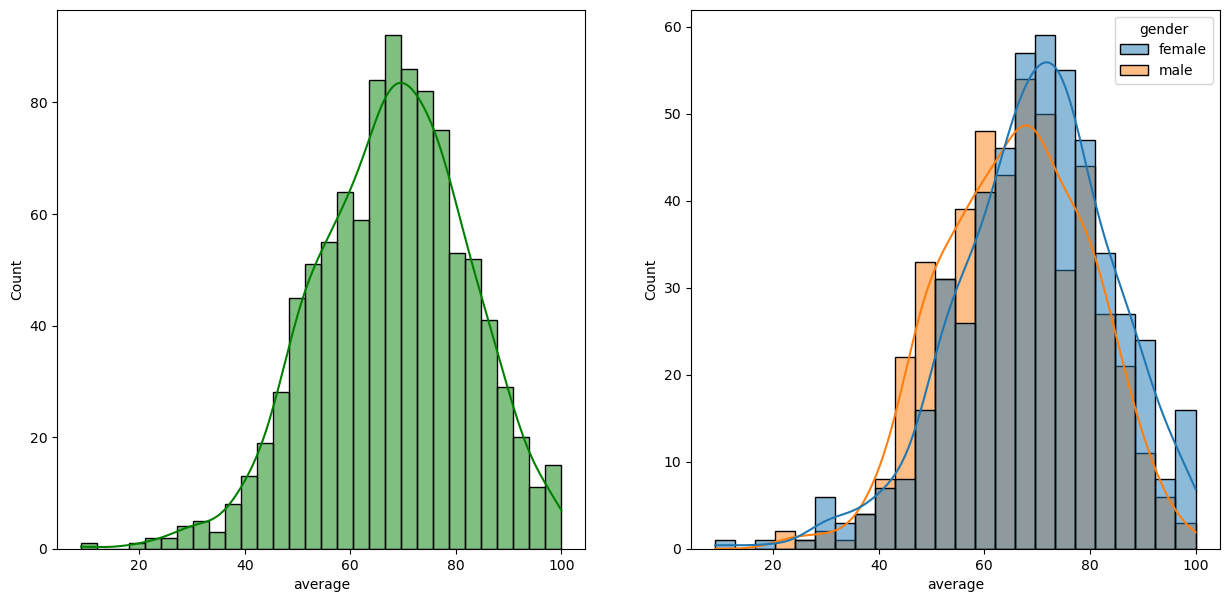

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

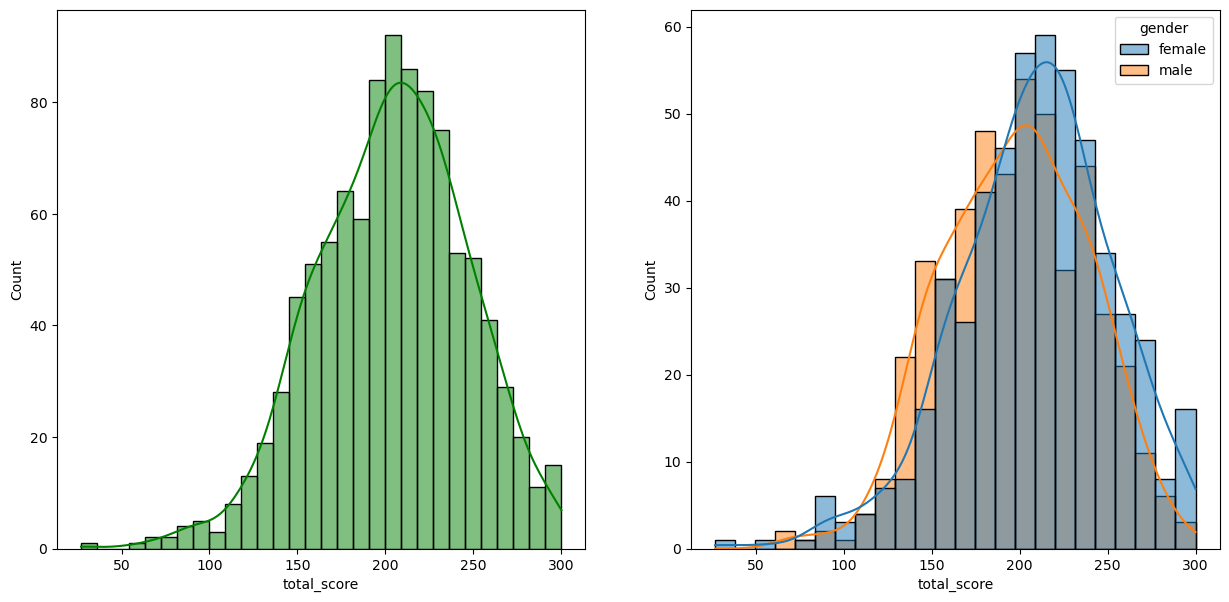

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

Female Students: Outperforming the Male Counterparts

# Visualizing the Performace : across Lunch, and Lunch + Gender Features

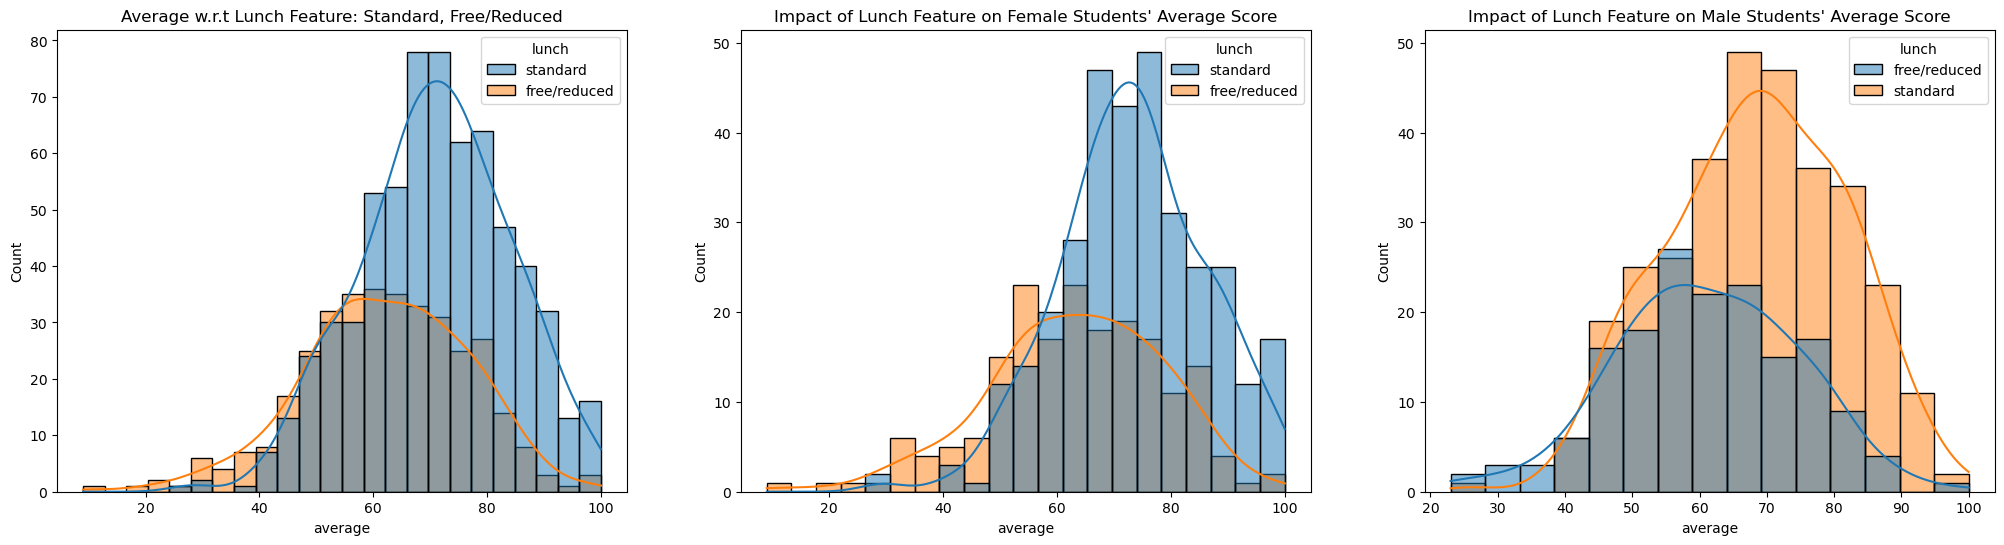

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("Average w.r.t Lunch Feature: Standard, Free/Reduced")
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')
plt.title("Impact of Lunch Feature on Female Students' Average Score")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.title("Impact of Lunch Feature on Male Students' Average Score")
plt.show()

# Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

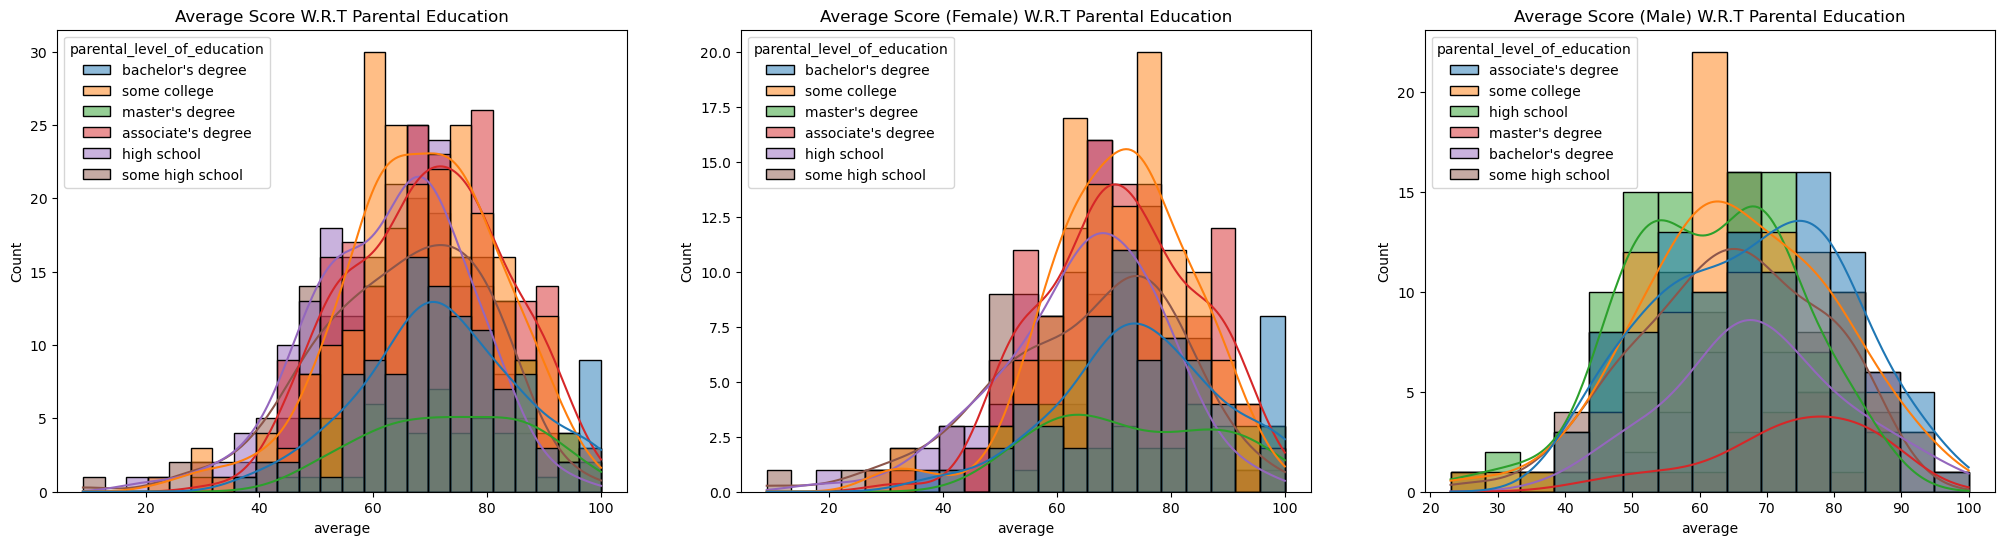

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("Average Score W.R.T Parental Education")
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Average Score (Female) W.R.T Parental Education")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Average Score (Male) W.R.T Parental Education")
plt.show()

##  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

# Average Score Vs. Race/Ethnicity Analysis

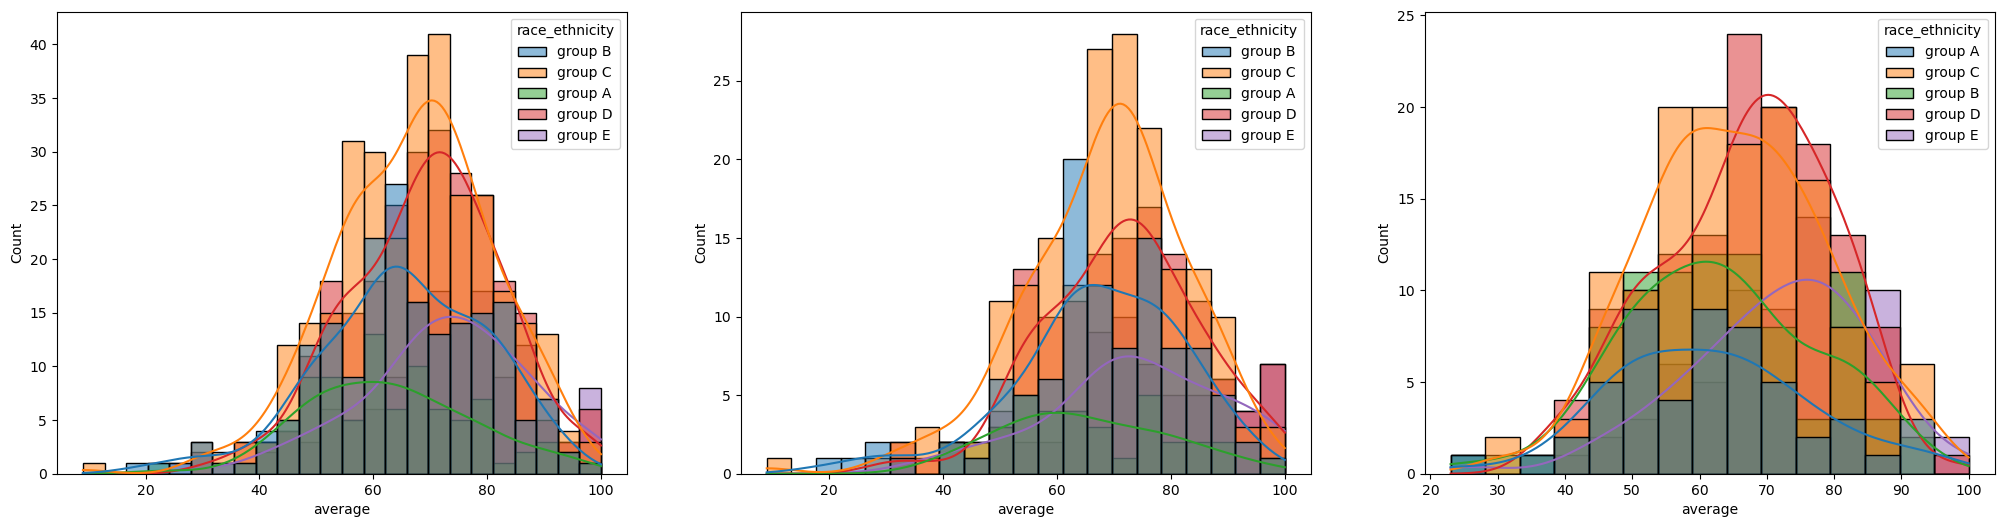

In [64]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

# Insights
- Students of group A, group B and group E tends to perform poorly in exam.
- Students of group A, group B and group E tends to perform poorly in exam irrespective of whether they are male or female.

In [66]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

# Maximumum score of students in all three subjects

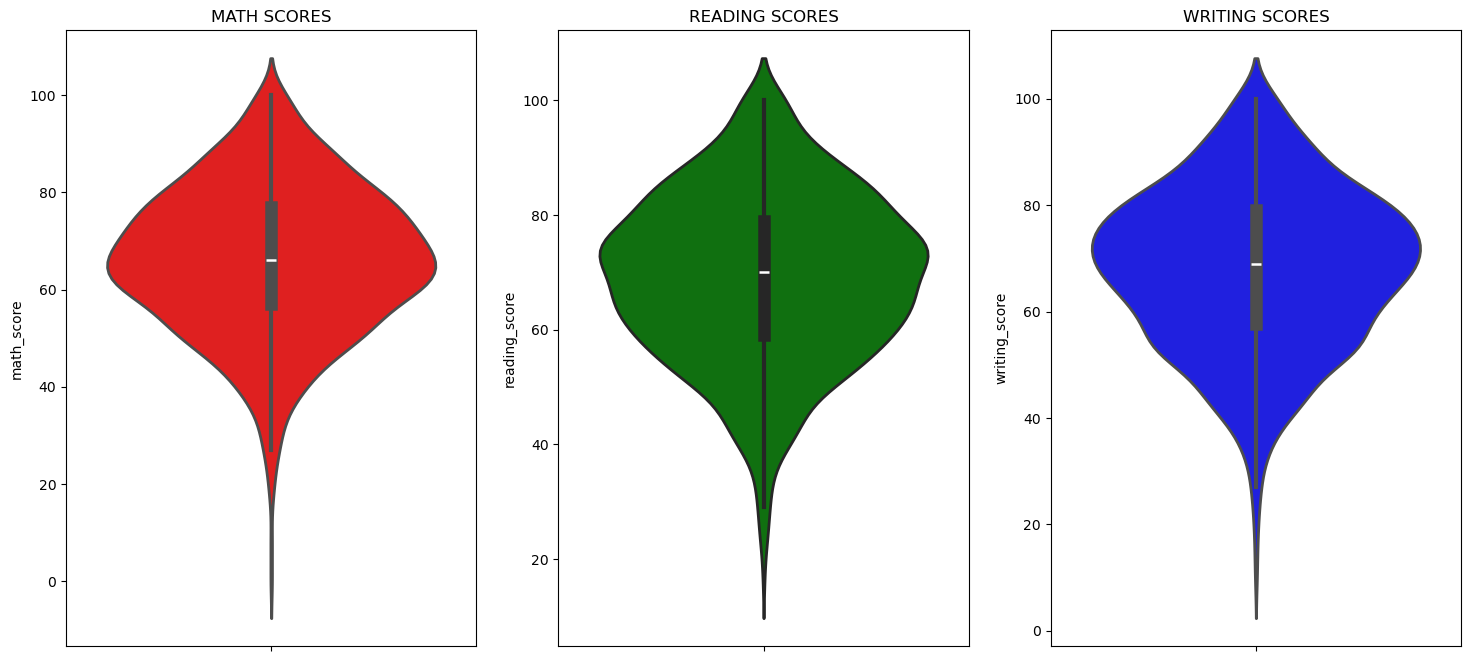

In [70]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=2)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=2)
plt.show()

# Insights:

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-90

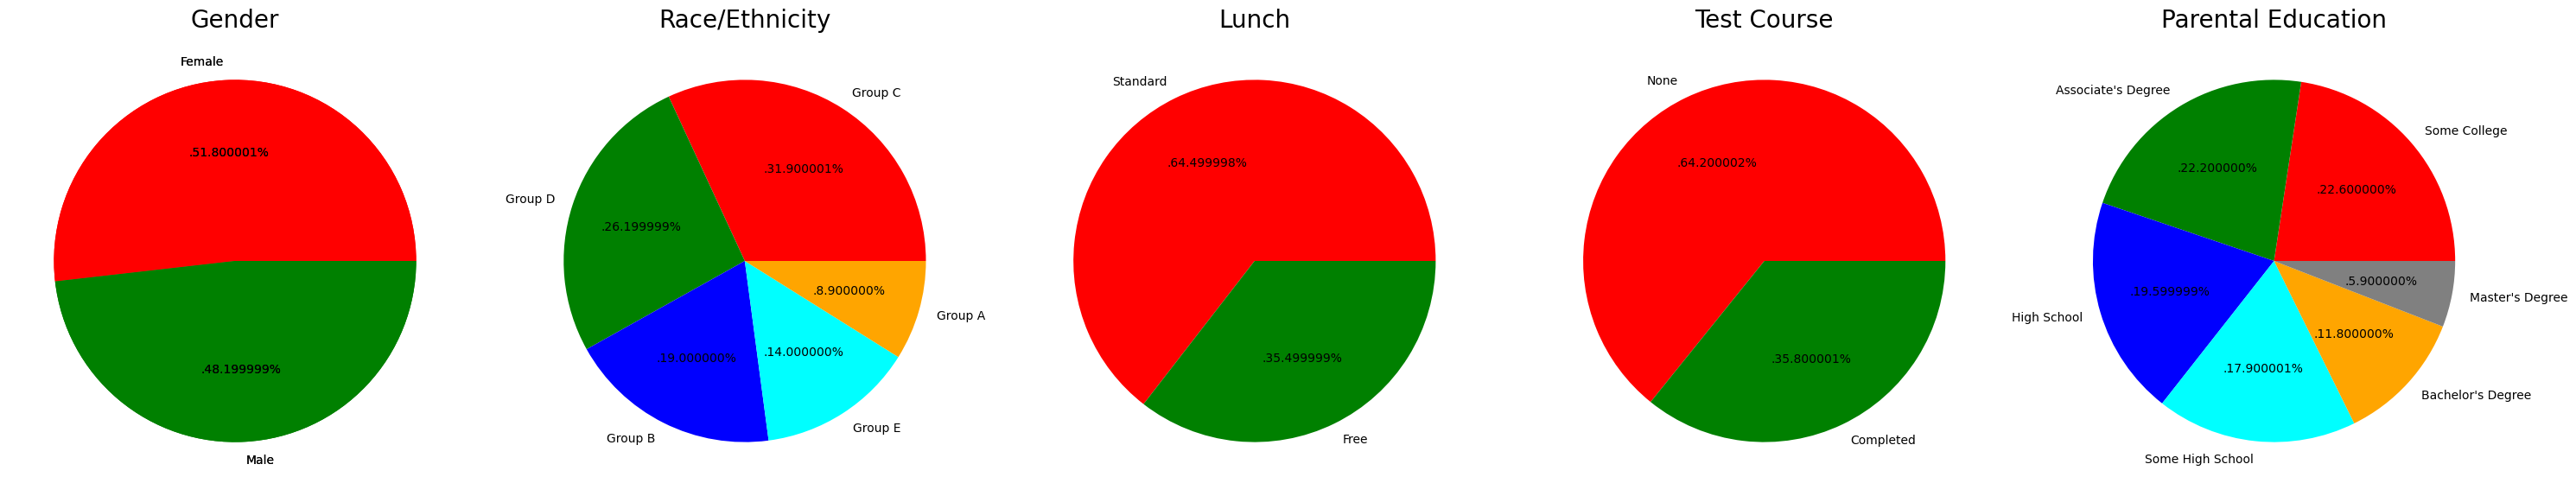

In [74]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1) # Gender Pie Chart
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2) # Race/Ethnicity Pie Chart
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3) # Lunch Feature Pie Chart
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4) # Test Preparation Course Pie Chart
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5) # Parental Level of Education Pie Chart
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

# Plot Draw Functions
plt.tight_layout()
plt.grid()

plt.show()

# Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Feature-Wise Distribution

Gender Impact on Performance

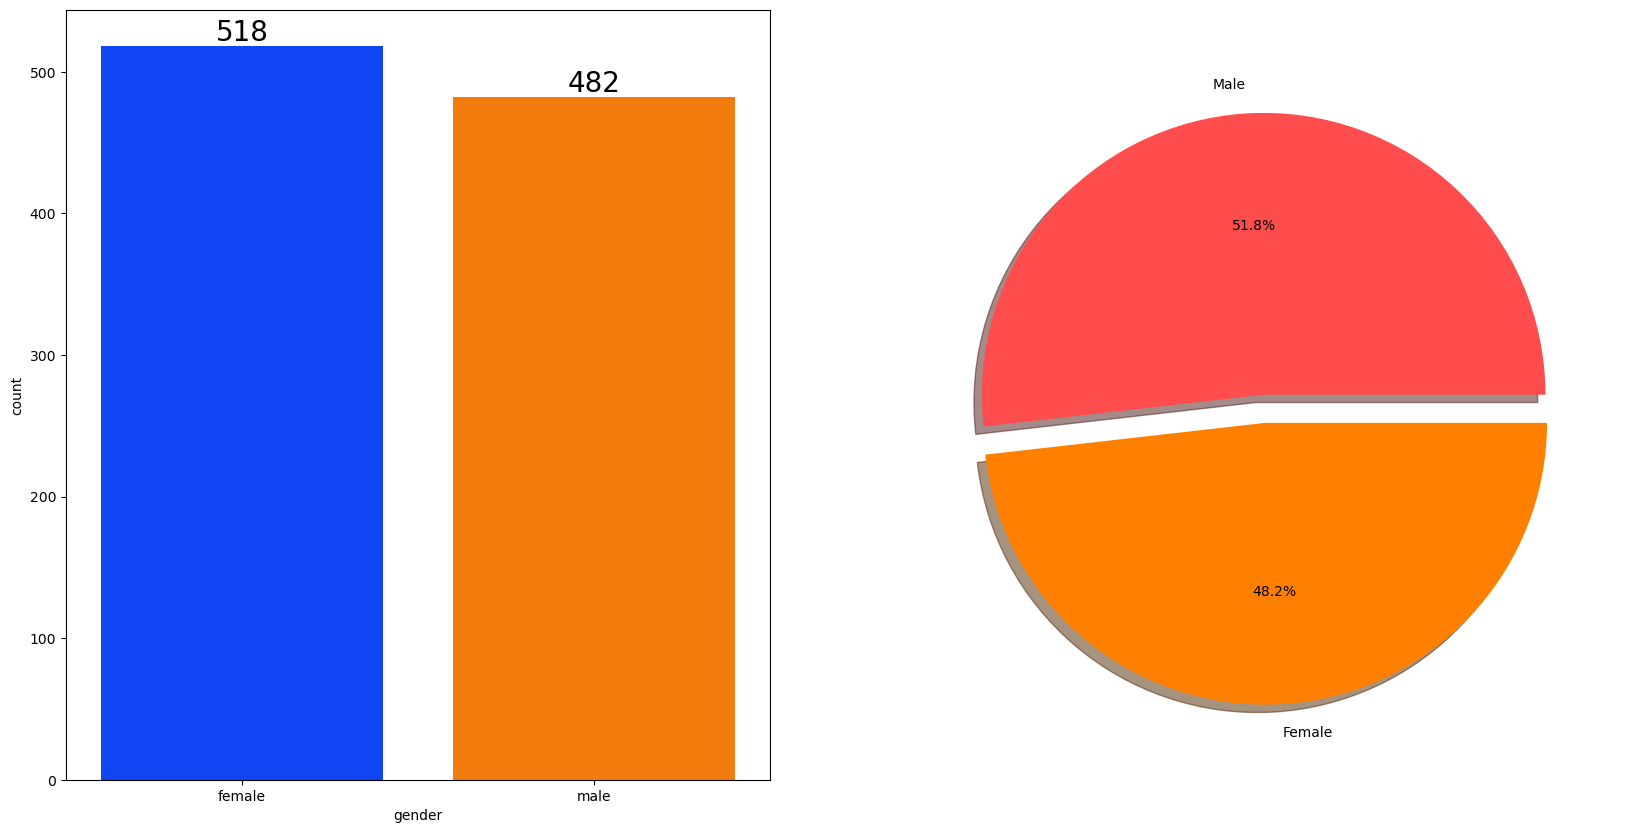

In [77]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [89]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Figure size 1000x800 with 0 Axes>

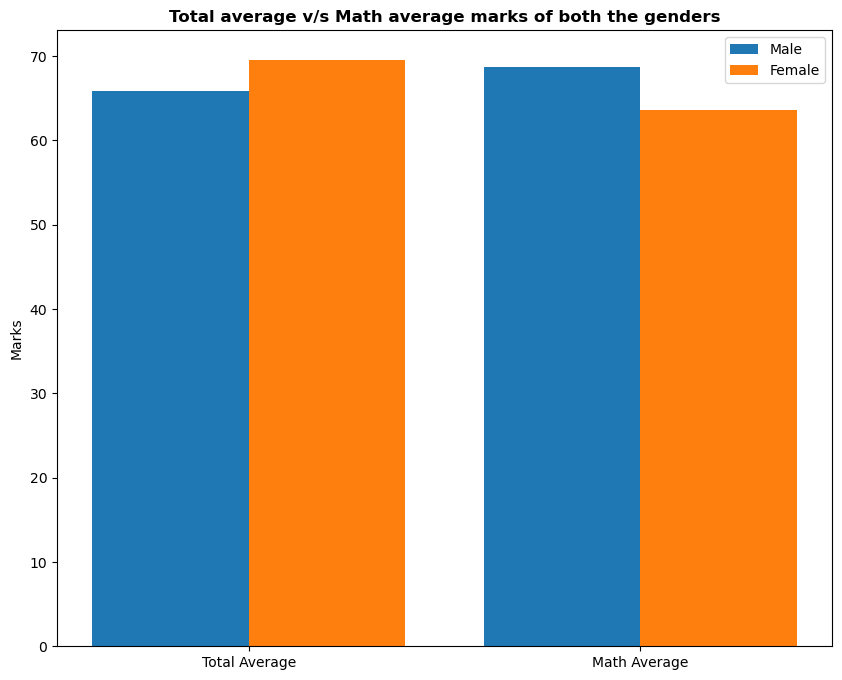

In [91]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

## RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

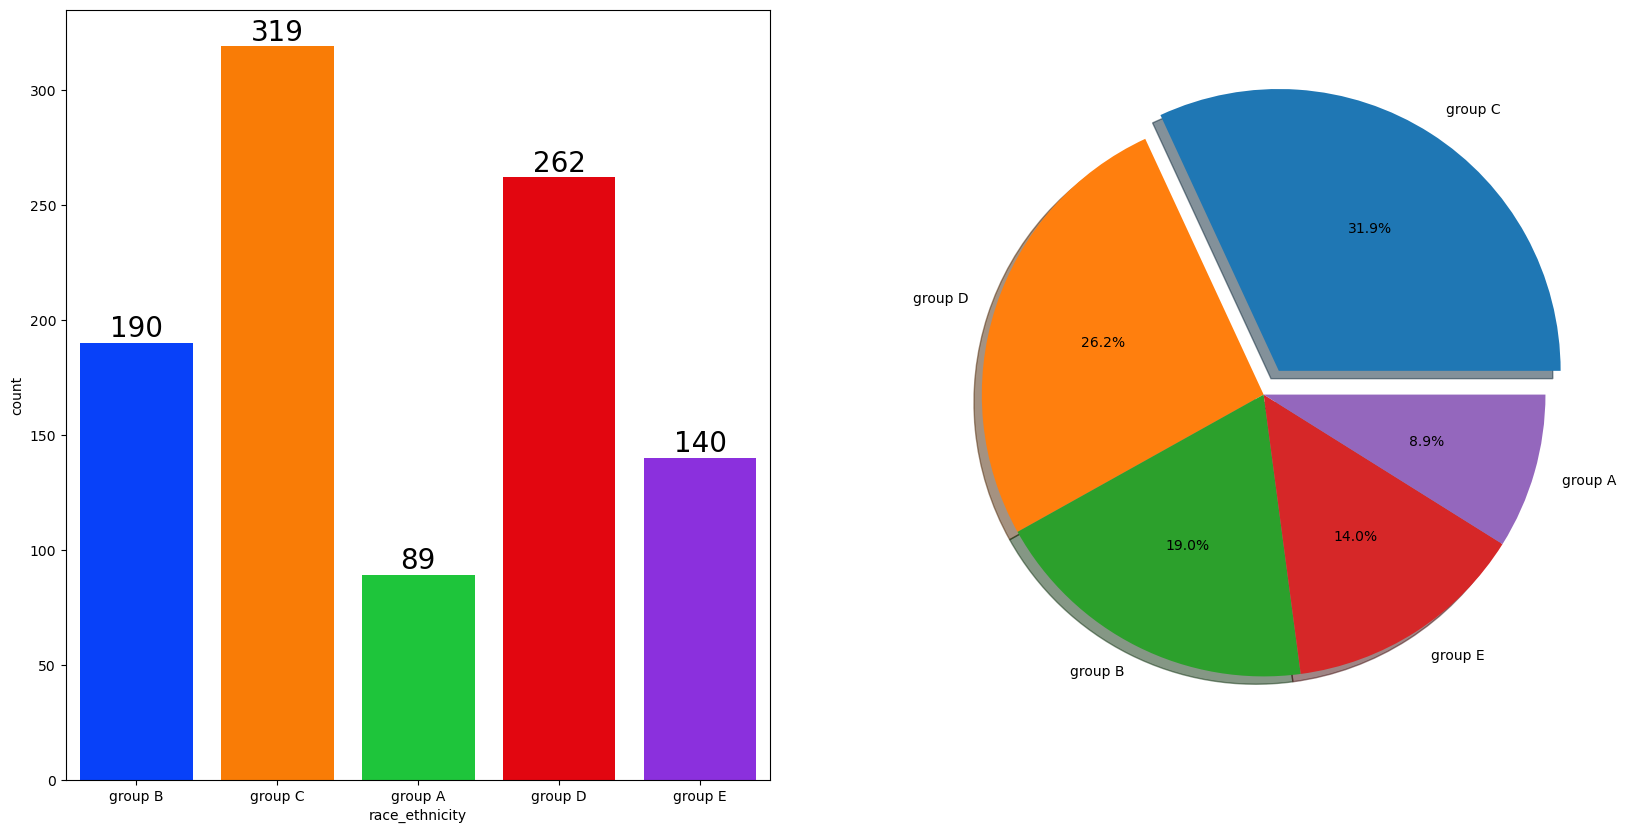

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

## BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

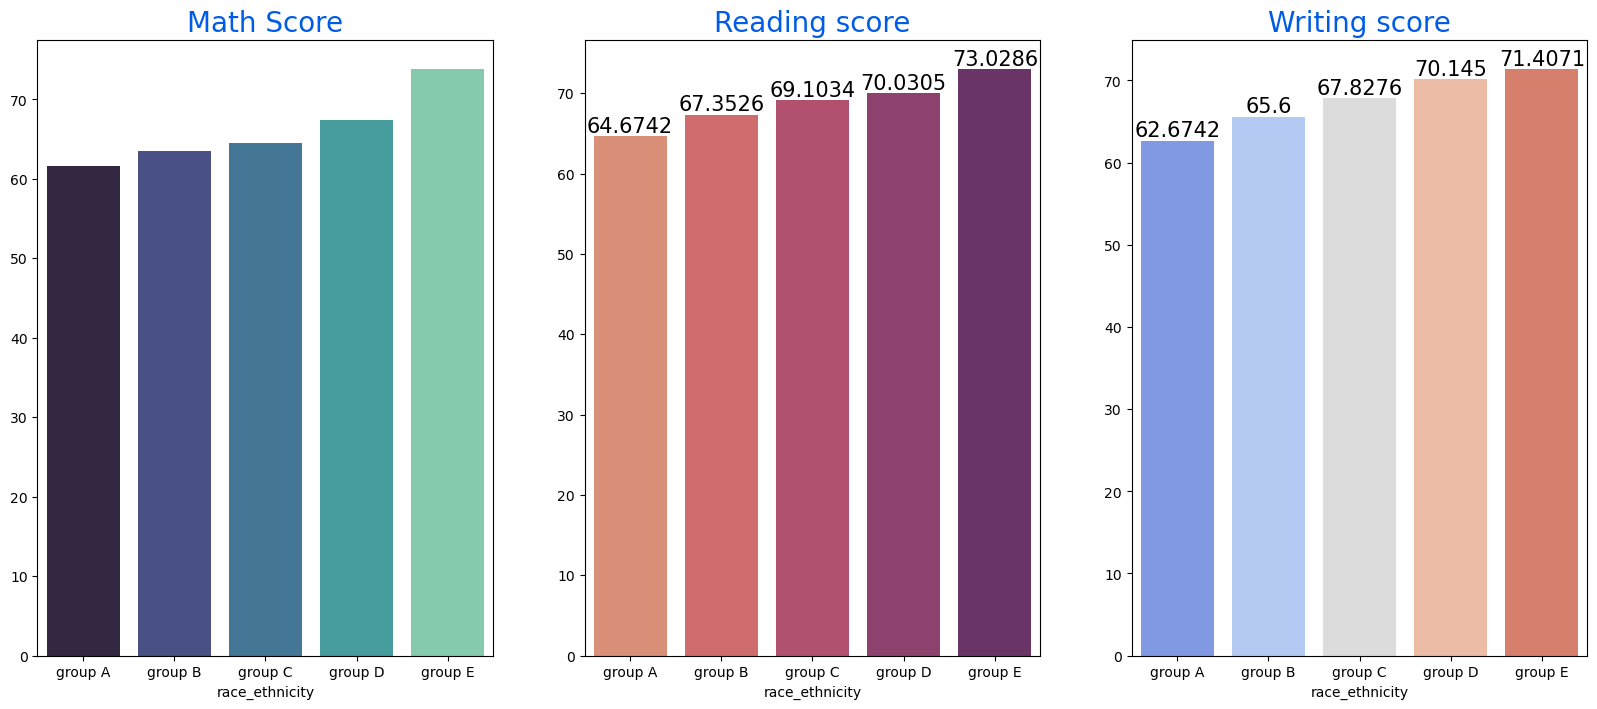

In [100]:
group_data2=df.groupby('race_ethnicity')
# group_data2.tail()
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


plt.show()


##### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

## PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

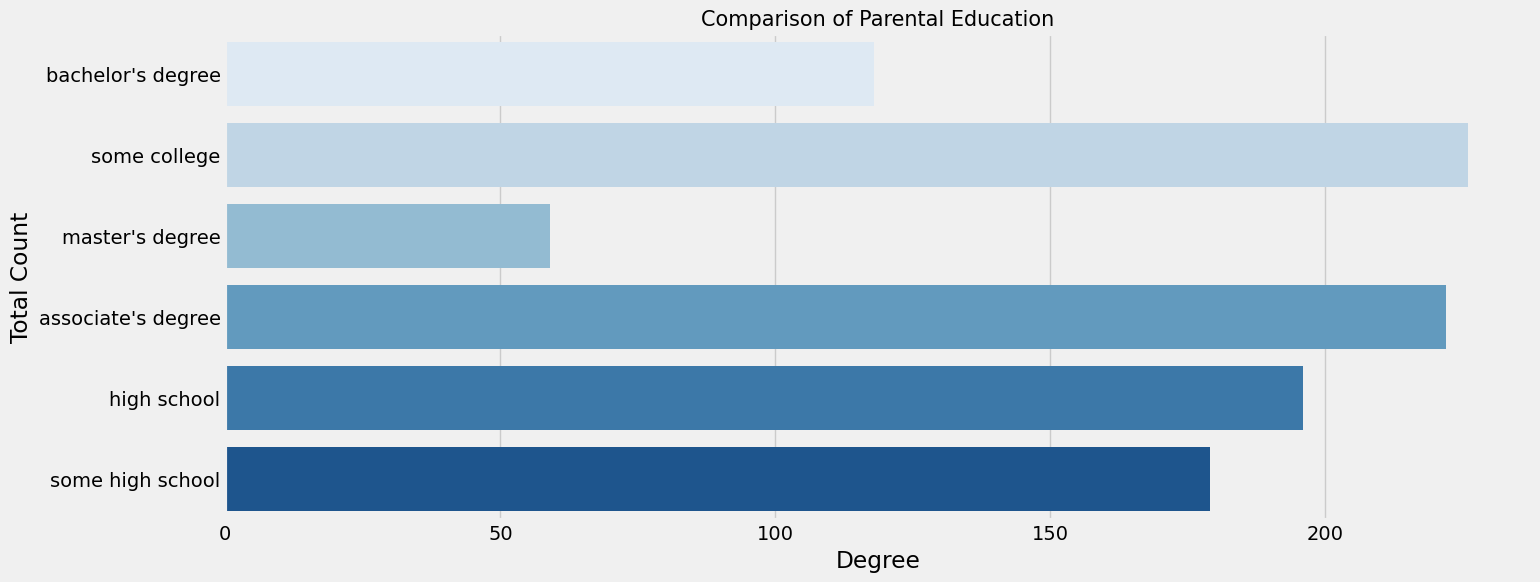

In [106]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 20, fontsize = 15)
plt.xlabel('Degree')
plt.ylabel('Total Count')
plt.show()

- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

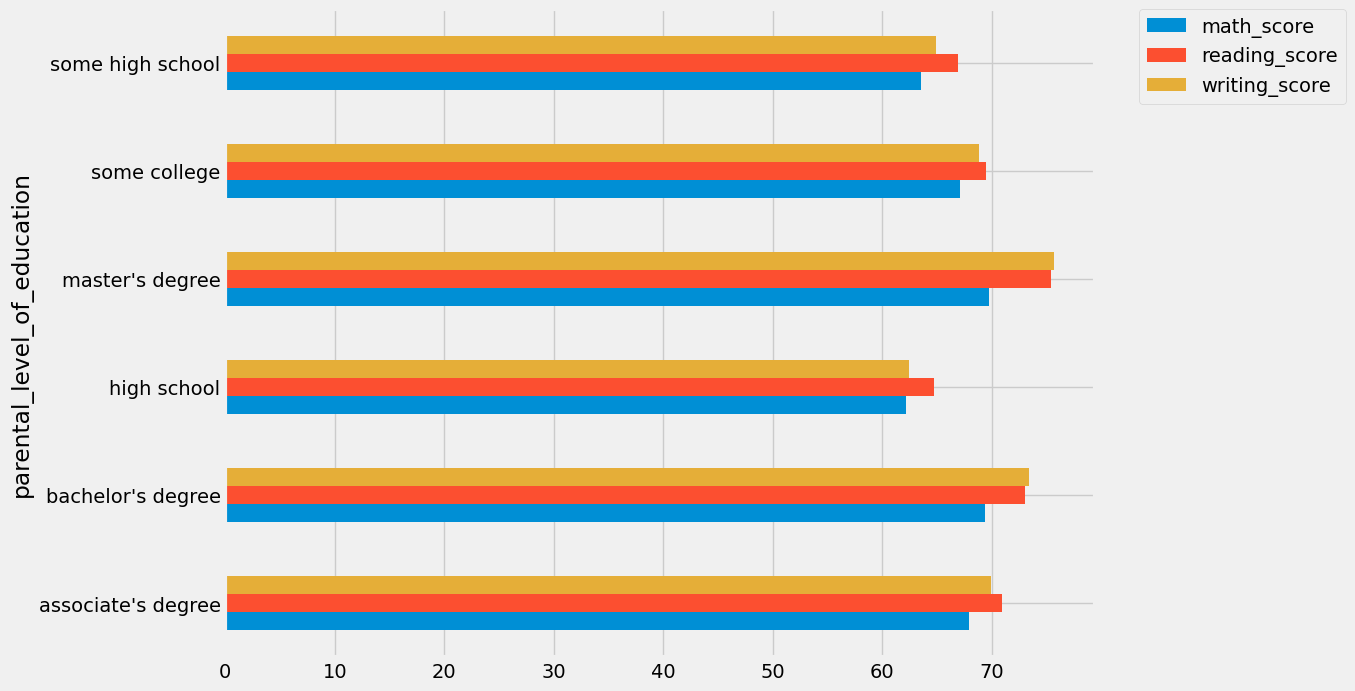

In [121]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].agg('mean').plot(kind='barh', figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

### LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


In [123]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


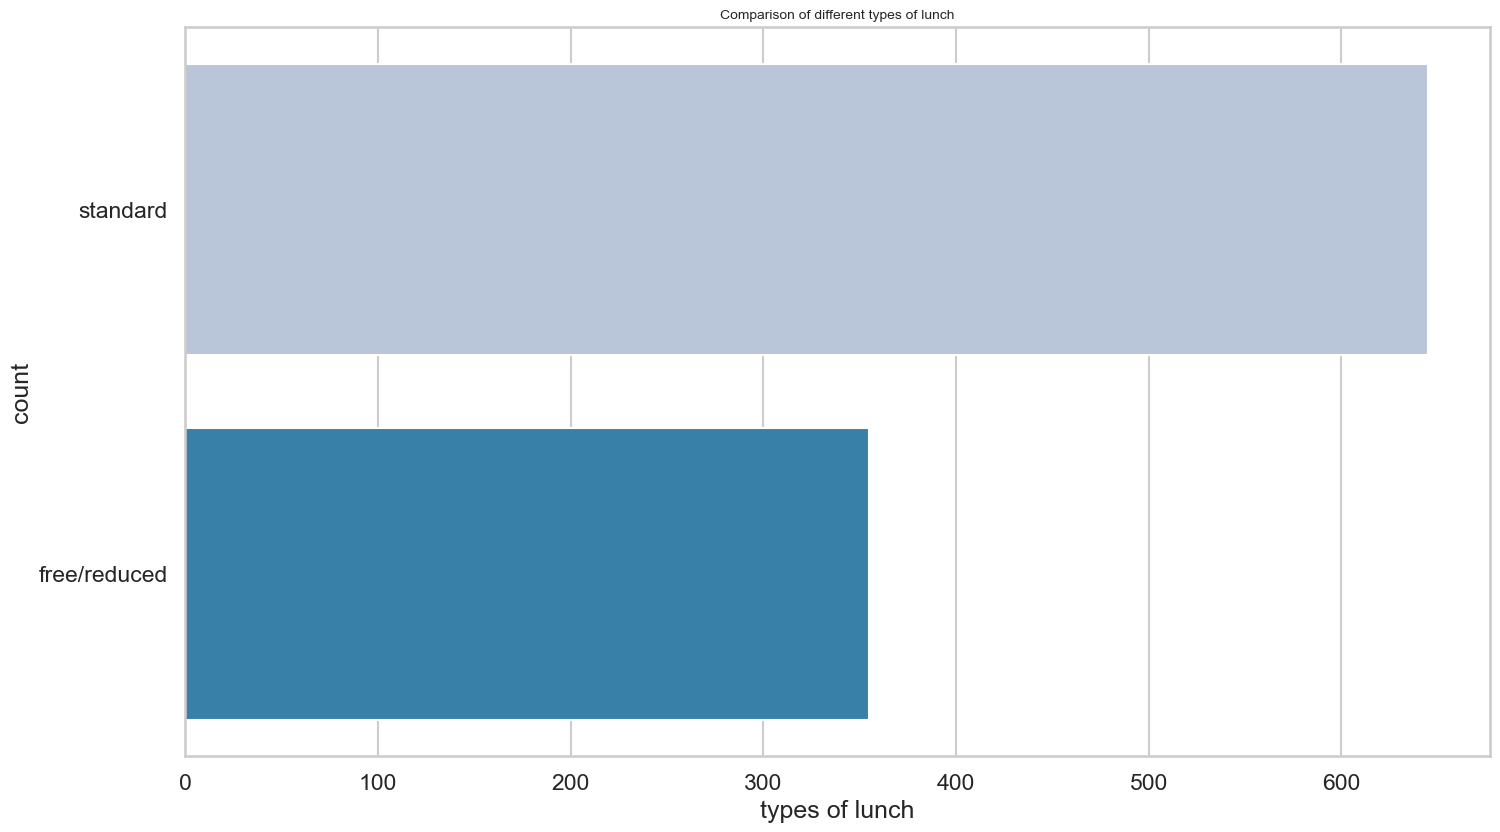

In [124]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')

sns.set_style("whitegrid")      # Or "darkgrid", "white", "ticks"
sns.set_context("talk") 

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 20, fontsize = 10)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

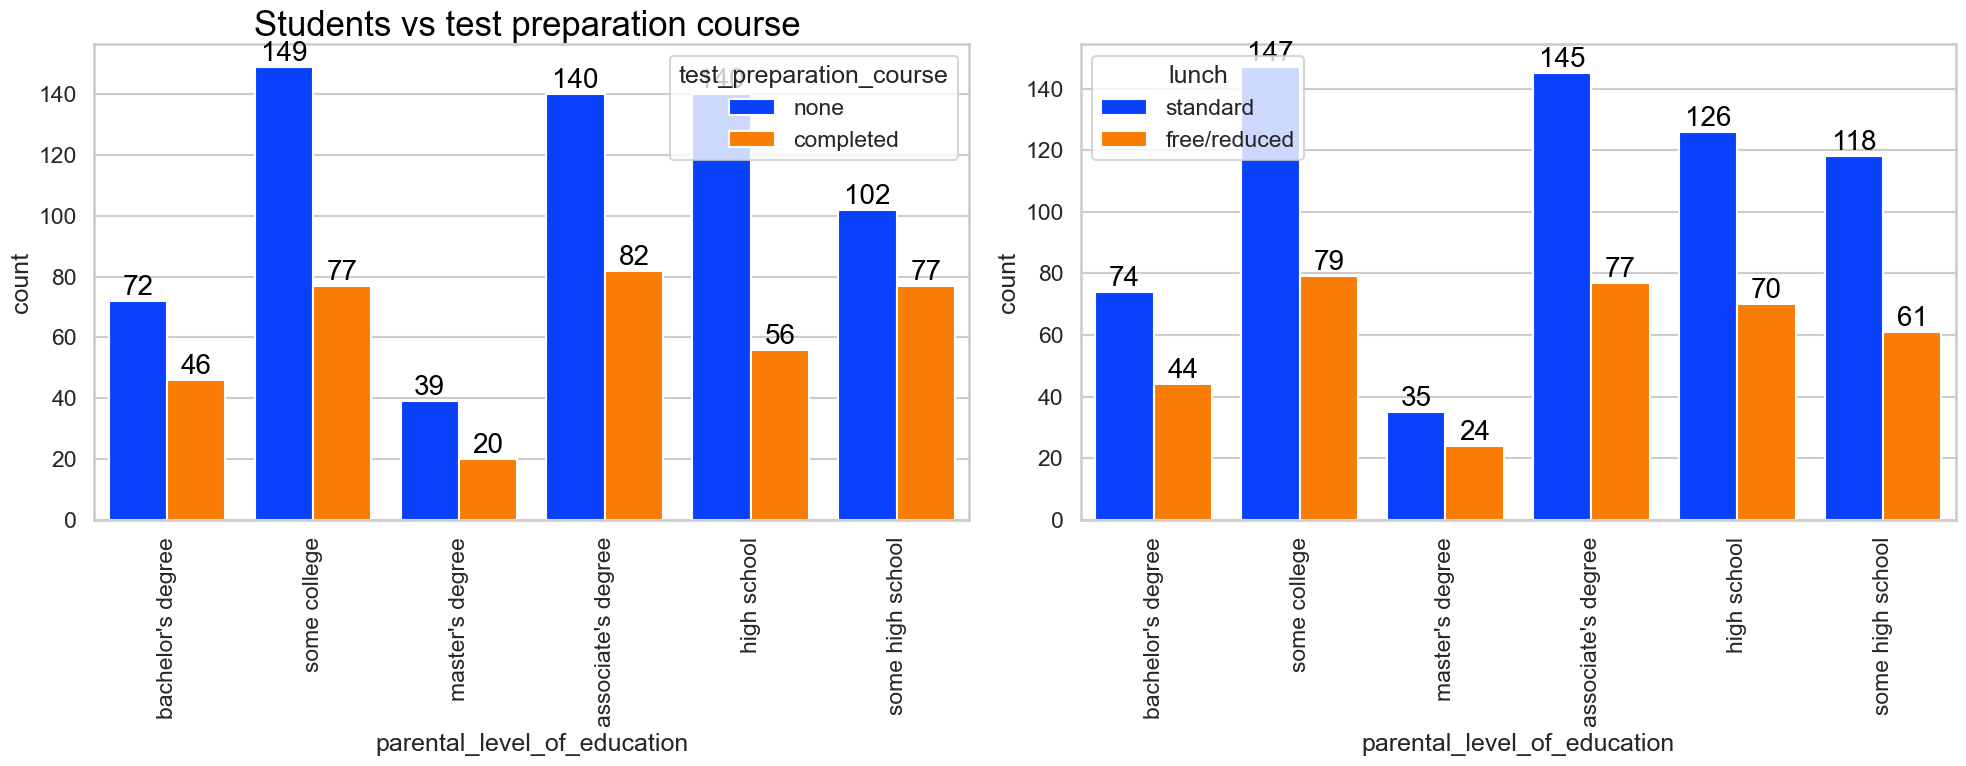

In [131]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0],)
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
    ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Checking Outliers

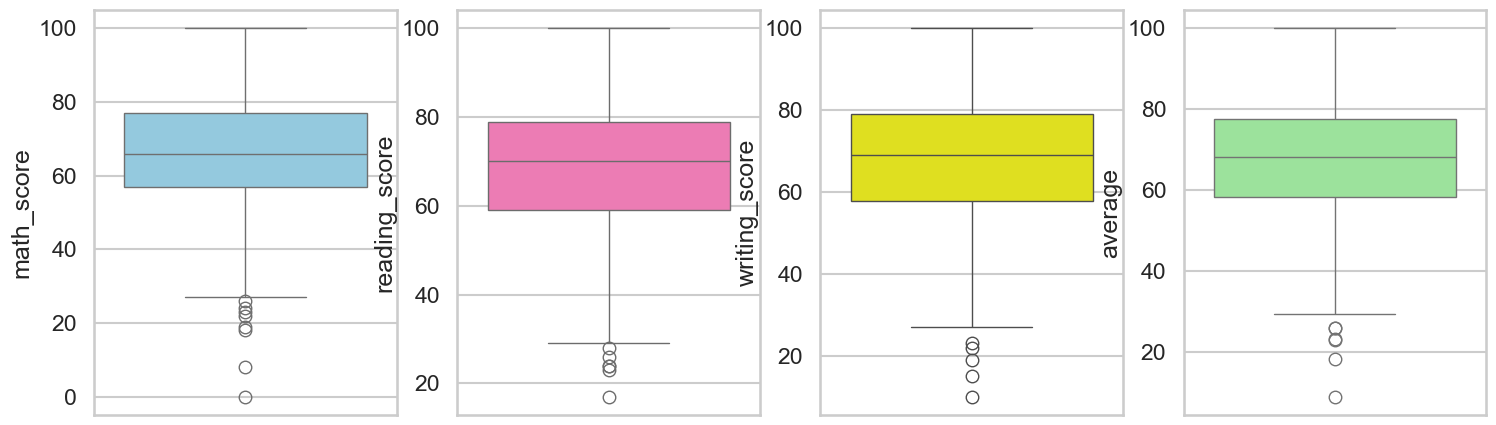

In [134]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# Multivariate Analysis using PAIRPLOT

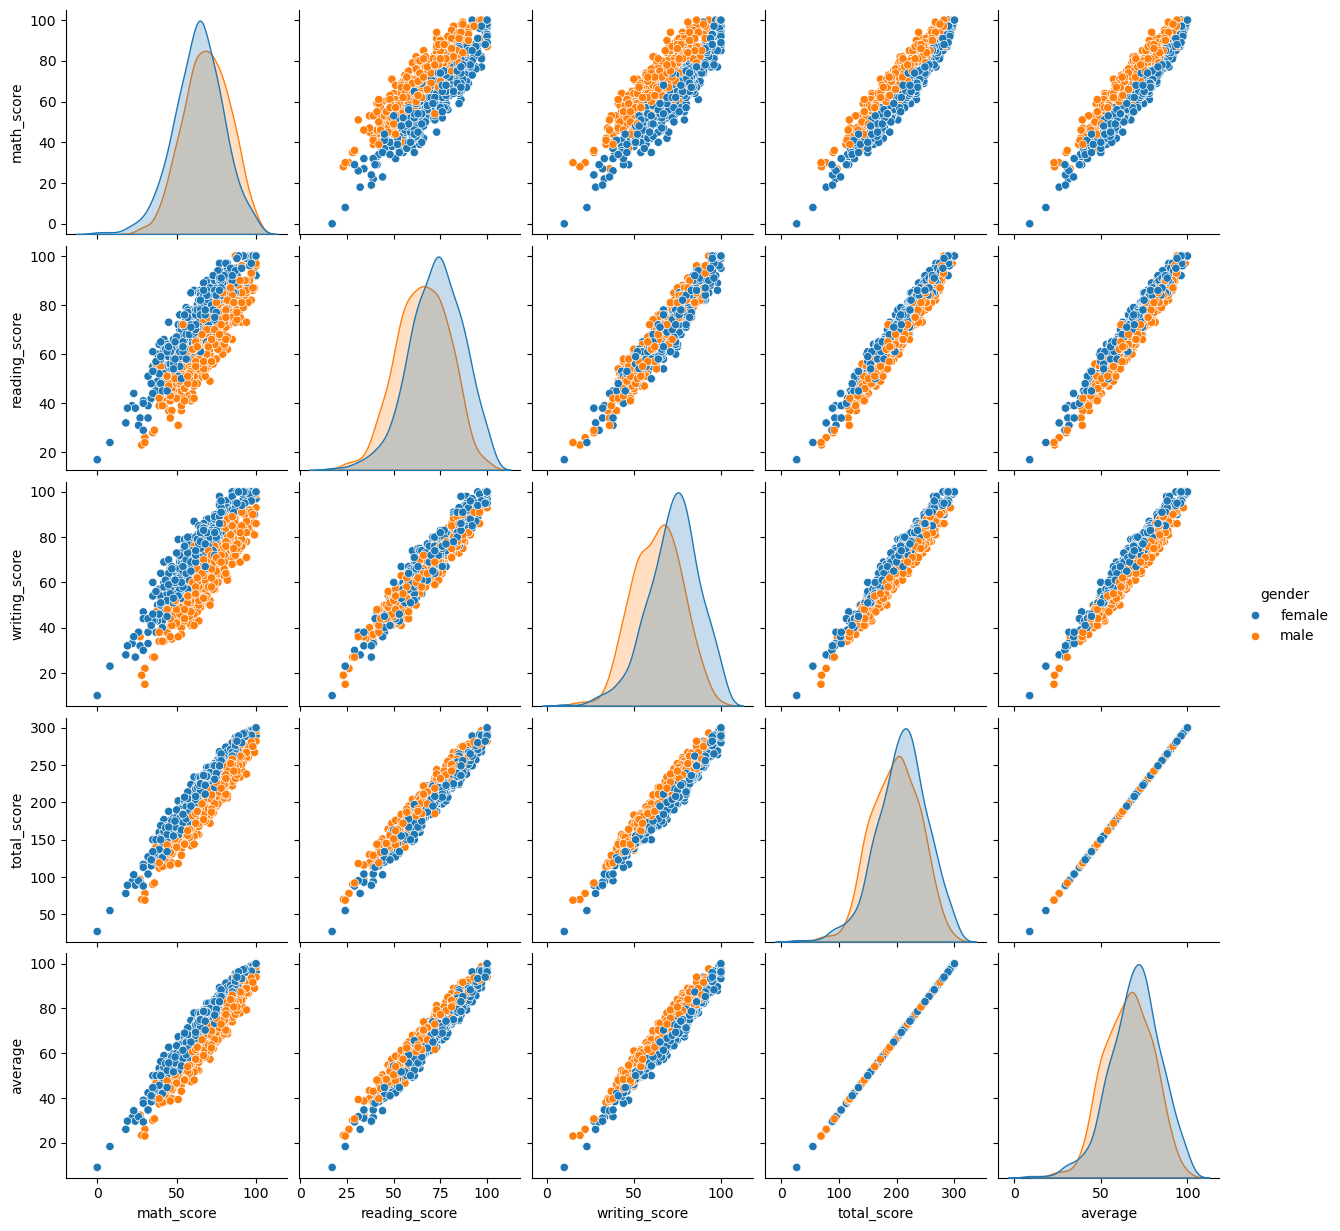

In [92]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.